### Módulo 3 | PAIR PROGRAMMING | Regresión 5 | 31/05/22 | Almudena & Lara

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,cohen_kappa_score
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# EJERCICIO 1  

Buscar un conjunto de datos a analizar: (Obviar si se reutiliza el conjunto de las clases anteriores)
 - Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. 
 Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. 
 Así mismo se recomienda que los datasets esten ligeramente limpios para facilidar los análisis.

In [2]:
df = pd.read_csv('mdc.csv', index_col=0, encoding='latin-1')
df.head()

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2
3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,3
4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,4
5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,5


In [3]:
var = df["entity"].values.reshape(-1, 1)

enc = OneHotEncoder()
trans = enc.fit_transform(var)
df[["Marvel", "DC"]] = pd.DataFrame(trans.toarray())

In [4]:
df.head()

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id,Marvel,DC
1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1,0.0,1.0
2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2,0.0,1.0
3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,3,0.0,1.0
4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,4,0.0,1.0
5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,5,0.0,1.0


# EJERCICIO 2

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado: (Obviar si se reutiliza el conjunto de las clases anteriores)
 - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
 - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

    - Lo obviamos porque está hecho en pairs anteriores.

# EJERCICIO 3

Realiza el ajuste logístico utilizando diversas métricas y realiza una gráfica mostrando los resultados.

In [6]:
df_numericas = df.select_dtypes(include=np.number)

In [15]:
df_numericas = df_numericas.dropna()

In [19]:
x = df_numericas.drop(['Marvel'], axis = 1)
y = df_numericas['Marvel']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(71, 11) (71,)
(18, 11) (18,)


In [25]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [26]:
get_VIF(df_numericas, "Marvel")

/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const            98609.008544
id                  14.126568
imdb_rating         14.031799
DC                  13.915996
tomato_review        9.345506
tom_aud_score        7.480127
year                 5.068313
tomato_meter         3.932753
imdb_gross           3.880648
imdb_votes           3.482336
tom_ratings          2.051415
runtime              1.620347
dtype: float64

Consideramos que habría que buscar otra variable categórica que pueda ser respuesta porque las variables independientes no van a predecir si una película es de Marvel o DC. Dicha variable debería estar codificada en 0 y 1. Cogeríamos la columna 'tom_aud_score' y dividiríamos en dos partes: por encima de 70 sería muy buena, y por debajo sería mala.
Creemos que a partir de entonces sería más fácil predecir si una película es de Marvel o DC.

In [20]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)
# ajustamos el modelo
log_reg.fit(x_train,y_train)
# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train)
# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test)


train_score_lr = accuracy_score(y_train, y_pred_train)
print('Para el conjunto train:---------------')
print('El valor de accuracy es ',train_score_lr)

print('Para el conjunto test:---------------')
test_score_lr = accuracy_score(y_test, y_pred_test)
print('El valor de accuracy es ',test_score_lr)

Para el conjunto train:---------------
El valor de accuracy es  0.6619718309859155
Para el conjunto test:---------------
El valor de accuracy es  0.6666666666666666


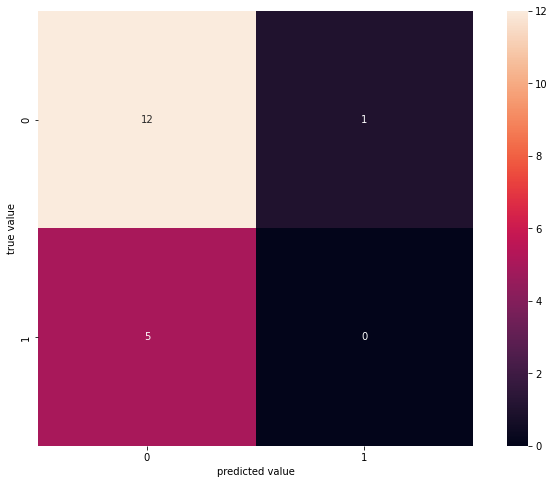

In [23]:
mat_lr = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d")

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()